#  Healthcare Patient Risk Analysis and Insights

## Project Objective
To analyze patient health data , identify key risk factors contributing to heart disease , diabetes using exploratory data analysis and risk scoring.

##  Why this project?
Early identification of high-risk patients helps clinicians take preventive actions, improve outcomes and reduce healthcare costs.

##  Tools & Techniques
- Python
- Pandas, NumPy
- Matplotlib, Seaborn
- Exploratory Data Analysis (EDA)
- Risk Scoring Logic
- ---


In [3]:
#Healthcare Dataset

import pandas as pd
import numpy as np

np.random.seed(42)

n = 500

df = pd.DataFrame({
    "Age": np.random.randint(18, 80, n),
    "Gender": np.random.choice(["Male","Female"], n),
    "BMI": np.random.normal(25, 5, n).round(1),
    "Blood_Pressure": np.random.randint(90, 180, n),
    "Sugar_Level": np.random.randint(70, 250, n),
    "Cholesterol": np.random.randint(150, 300, n),
    "Smoking": np.random.choice(["Yes", "No"], n),
})

df["Diabetes_Risk"] = np.where(df["Sugar_Level"] > 140, "High", "Low")
df["Heart_Risk"] = np.where((df["Blood_Pressure"] > 140) | (df["Cholesterol"] > 240), "High", "Low")


df.head()

,Age,Gender,BMI,Blood_Pressure,Sugar_Level,Cholesterol,Smoking,Diabetes_Risk,Heart_Risk
0,56,Female,28.5,119,90,235,Yes,Low,Low
1,69,Male,24.3,128,220,299,No,High,High
2,46,Female,24.6,120,176,238,No,High,Low
3,32,Male,23.6,171,149,171,Yes,High,High
4,60,Male,26.5,91,116,241,Yes,Low,High


In [4]:
#DATASET SHAPE

df.shape

(500, 9)

In [5]:
#DATASET COLUMNS NAMES

df.columns

Index(['Age', 'Gender', 'BMI', 'Blood_Pressure', 'Sugar_Level', 'Cholesterol',
       'Smoking', 'Diabetes_Risk', 'Heart_Risk'],
      dtype='object')

In [11]:
#DATASET INFO

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             500 non-null    int32  
 1   Gender          500 non-null    object 
 2   BMI             500 non-null    float64
 3   Blood_Pressure  500 non-null    int32  
 4   Sugar_Level     500 non-null    int32  
 5   Cholesterol     500 non-null    int32  
 6   Smoking         500 non-null    object 
 7   Diabetes_Risk   500 non-null    object 
 8   Heart_Risk      500 non-null    object 
dtypes: float64(1), int32(4), object(4)
memory usage: 27.5+ KB


In [14]:
#SAMPLE PATIENT RECORD

df.head(10)

,Age,Gender,BMI,Blood_Pressure,Sugar_Level,Cholesterol,Smoking,Diabetes_Risk,Heart_Risk
0,56,Female,28.5,119,90,235,Yes,Low,Low
1,69,Male,24.3,128,220,299,No,High,High
2,46,Female,24.6,120,176,238,No,High,Low
3,32,Male,23.6,171,149,171,Yes,High,High
4,60,Male,26.5,91,116,241,Yes,Low,High
5,25,Female,19.5,167,186,178,Yes,High,High
6,78,Female,26.7,166,193,162,Yes,High,High
7,38,Female,24.6,101,212,151,Yes,High,Low
8,56,Male,26.4,128,94,178,Yes,Low,Low
9,75,Female,26.4,155,105,176,No,Low,High


In [15]:
#SUMMARY

df.describe()

,Age,BMI,Blood_Pressure,Sugar_Level,Cholesterol
count,500.000000,500.00000,500.000000,500.000000,500.000000
mean,49.910000,24.74340,134.610000,162.908000,226.496000
std,18.221909,5.14956,26.334786,53.763375,44.283044
min,18.000000,7.60000,90.000000,71.000000,150.000000
25%,35.000000,21.40000,111.750000,114.500000,188.750000
50%,50.000000,24.80000,134.500000,167.500000,226.500000
75%,66.000000,28.32500,159.000000,212.000000,265.000000
max,79.000000,38.90000,179.000000,249.000000,299.000000


In [16]:
#FIND MISSING VALUES

df.isnull().sum()

Age               0
Gender            0
BMI               0
Blood_Pressure    0
Sugar_Level       0
Cholesterol       0
Smoking           0
Diabetes_Risk     0
Heart_Risk        0
dtype: int64

In [7]:
# FILL MISSING VALUES WITH MEAN

df["BMI"] = df["BMI"].fillna(df["BMI"].mean())
df["Blood_Pressure"] = df["Blood_Pressure"].fillna(df["Blood_Pressure"].mean())
df["Sugar_Level"] = df["Sugar_Level"].fillna(df["Sugar_Level"].mean())
df["Cholesterol"] = df["Cholesterol"].fillna(df["Cholesterol"].mean())

In [8]:
# FILL MISSING VALUES WITH MODE

df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Smoking"] = df["Smoking"].fillna(df["Smoking"].mode()[0])


In [34]:
#CHECK FOR MISSING VALUES

df.isnull().sum()


Age               0
Gender            0
BMI               0
Blood_Pressure    0
Sugar_Level       0
Cholesterol       0
Smoking           0
Diabetes_Risk     0
Heart_Risk        0
dtype: int64

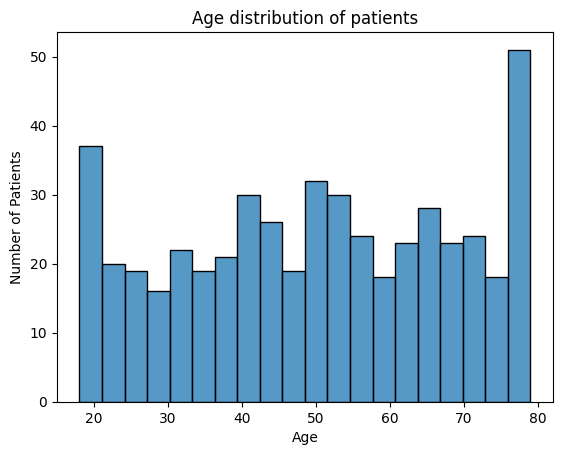

In [13]:
#AGE DISTRIBUTION (Population Overview)

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Age"], bins=20)
plt.title("Age distribution of patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()

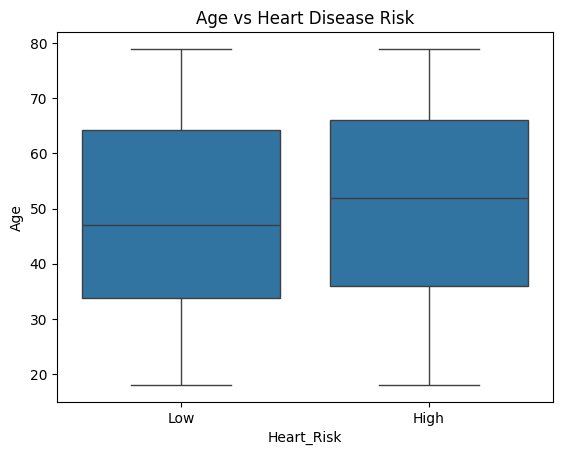

In [21]:
#AGE vs HEART DISEASE RISK

sns.boxplot(x="Heart_Risk", y="Age",data=df)
plt.title("Age vs Heart Disease Risk")
plt.show()

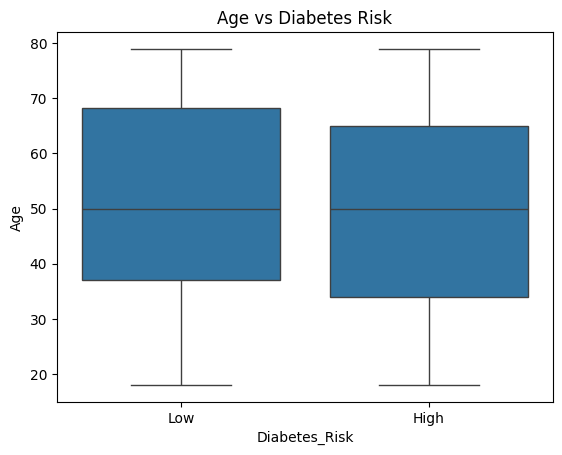

In [22]:
#AGE vs DIABETES RISK

sns.boxplot(x="Diabetes_Risk",y="Age", data=df)
plt.title("Age vs Diabetes Risk")
plt.show()

In [38]:
#INSIGHT

df.groupby("Heart_Risk")["Age"].mean()

Heart_Risk
High    50.48494
Low     48.77381
Name: Age, dtype: float64

In [37]:
#INSIGHT

df.groupby("Diabetes_Risk")["Age"].mean()

Diabetes_Risk
High    49.330128
Low     50.872340
Name: Age, dtype: float64

### what did we analyze?

This section analyzes effect, impact of age on heart disease and diabetes risk.


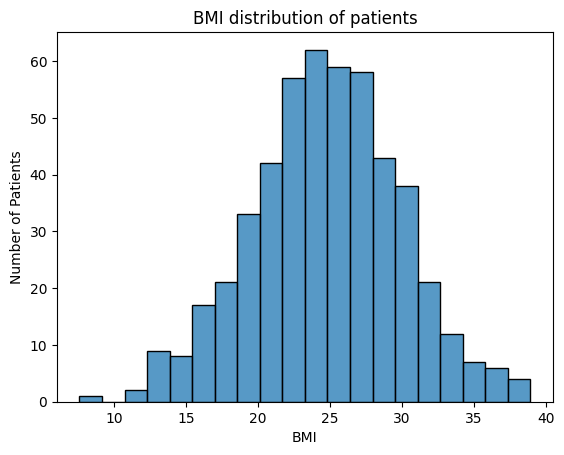

In [39]:
#BMI DISTRIBUTION

sns.histplot(df["BMI"],bins=20)
plt.title("BMI distribution of patients")
plt.xlabel("BMI")
plt.ylabel("Number of Patients")
plt.show()

In [40]:
#BMI CATEGORIZATION

df["BMI_Category"] = pd.cut(
    df["BMI"],
    bins=[0, 18.5, 24.9, 29.9 ,100],
    labels=["Underweight", "Normal", "Overweight", "Obese"]
)

df["BMI_Category"].value_counts()

BMI_Category
Normal         195
Overweight     174
Obese           73
Underweight     58
Name: count, dtype: int64

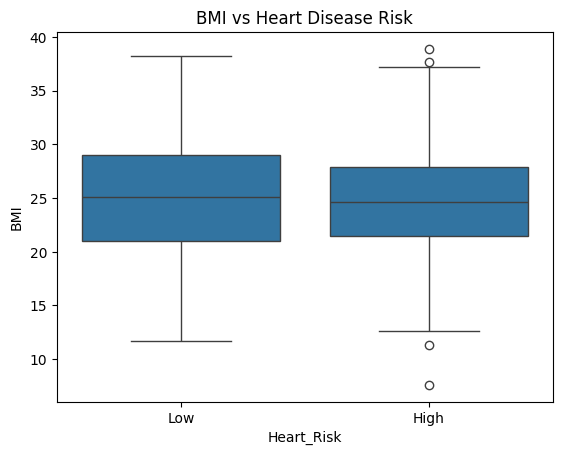

In [42]:
#BMI vs HEART RISK

sns.boxplot(x="Heart_Risk",y="BMI",data=df)
plt.title("BMI vs Heart Disease Risk")
plt.show()

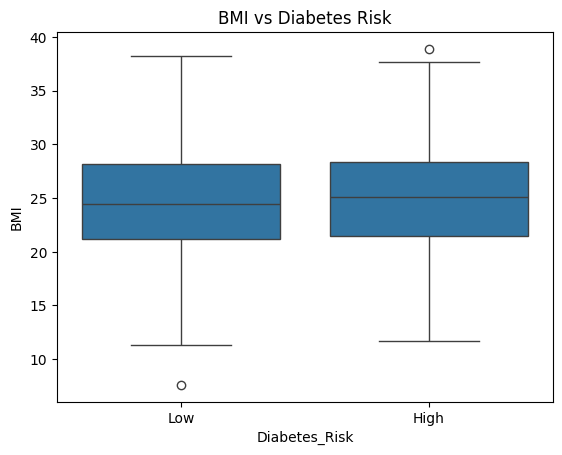

In [43]:
#BMI vs DIABETES RISK

sns.boxplot(x="Diabetes_Risk",y="BMI",data=df)
plt.title("BMI vs Diabetes Risk")
plt.show()

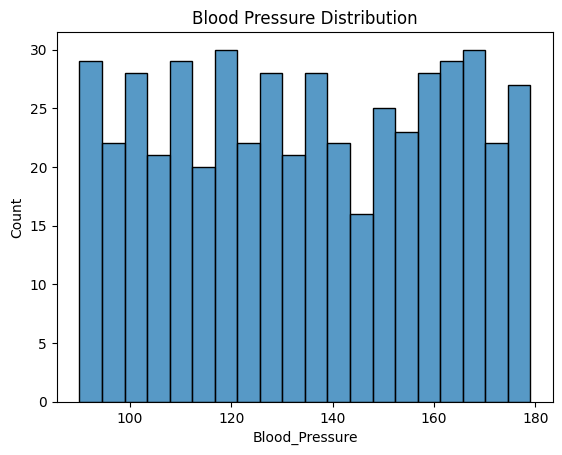

In [44]:
#BP AND SUGAR RISK ANALYSIS

sns.histplot(df["Blood_Pressure"],bins=20)
plt.title("Blood Pressure Distribution")
plt.show()

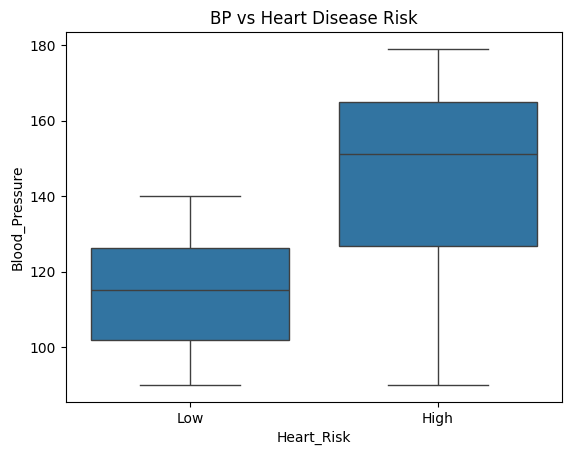

In [45]:
#BP vs HEART RISK

sns.boxplot(x="Heart_Risk",y="Blood_Pressure",data=df)
plt.title("BP vs Heart Disease Risk")
plt.show()

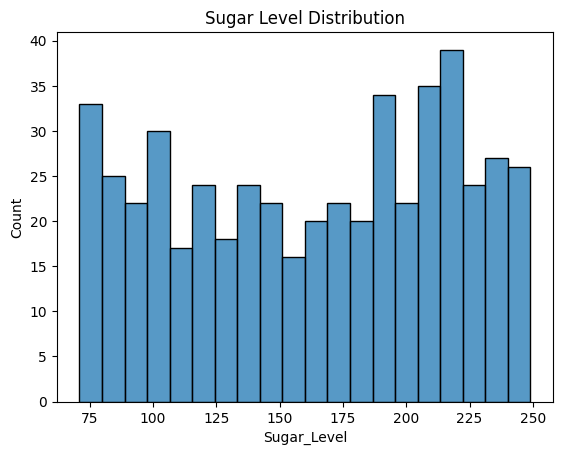

In [49]:
#SUGAR LEVEL DISTRIBUTION

sns.histplot(df["Sugar_Level"],bins=20)
plt.title("Sugar Level Distribution")
plt.show()

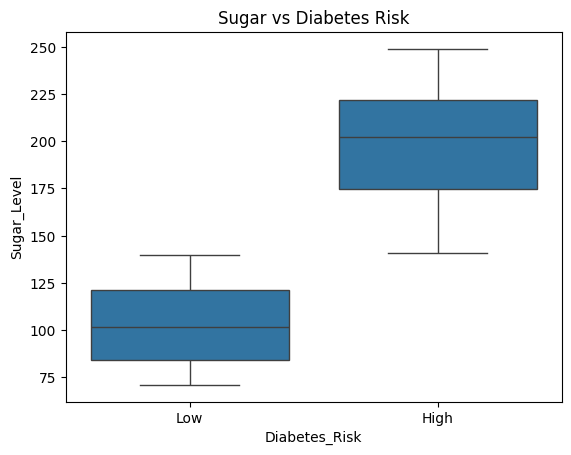

In [47]:
#SUGAR vs DIABETES RISK

sns.boxplot(x="Diabetes_Risk",y="Sugar_Level",data=df)
plt.title("Sugar vs Diabetes Risk")
plt.show()

### Why this step?

This section analyzes blood pressure and sugar levels to understand their impact on heart disease and diabetes risk.


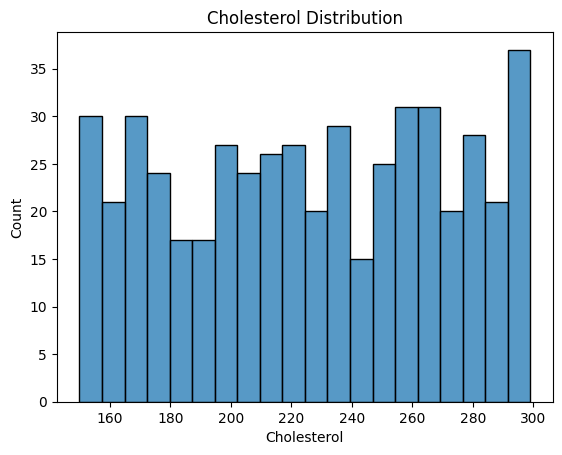

In [50]:
#CHOLESTEROL DISTRIBUTION

sns.histplot(df["Cholesterol"],bins=20)
plt.title("Cholesterol Distribution")
plt.show()

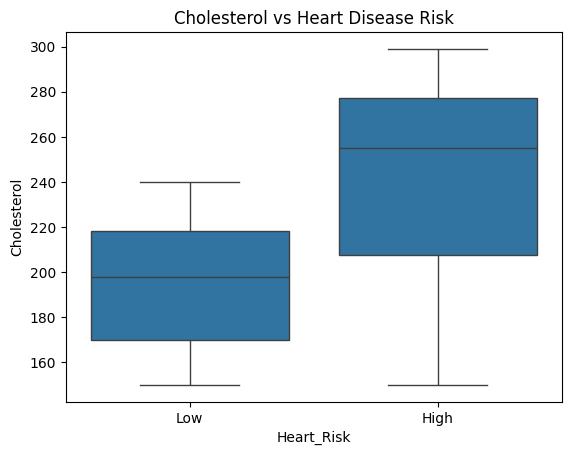

In [51]:
#CHOLESTEROL vs HEART RISK

sns.boxplot(x="Heart_Risk",y="Cholesterol",data =df)
plt.title("Cholesterol vs Heart Disease Risk")
plt.show()

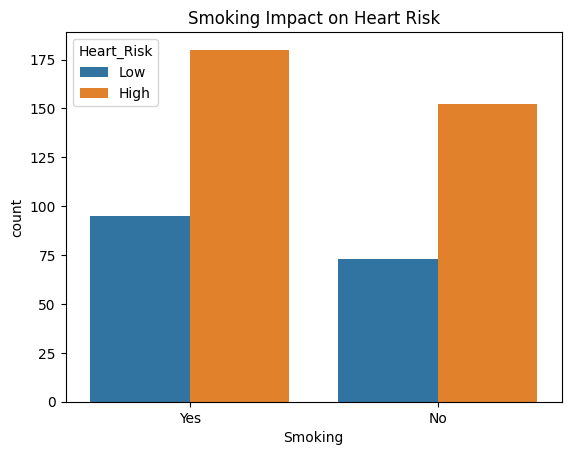

In [52]:
#SMOKING vs HEART RISK

sns.countplot(x="Smoking",hue="Heart_Risk",data = df)
plt.title("Smoking Impact on Heart Risk")
plt.show()

### key insights:
* Impact of smoking on Heart_Risk
* Correlation between Cholesterol ,Heart_Disease_Risk

In [9]:
#RISK COLUMN

import numpy as np

df["High_Risk_Patient"] = np.where(
    (df["Heart_Risk"] == "High") & (df["Diabetes_Risk"] == "High"),
    "Yes",
    "No"
)

df["High_Risk_Patient"].value_counts()

High_Risk_Patient
No     291
Yes    209
Name: count, dtype: int64

In [10]:
#COUNT OF HIGH RISK PATIENTS

df["High_Risk_Patient"].value_counts(normalize=True) * 100

High_Risk_Patient
No     58.2
Yes    41.8
Name: proportion, dtype: float64

In [11]:
#VIEW HIGH RISK PATIENTS

df[df["High_Risk_Patient"] == "Yes"].head(10)

,Age,Gender,BMI,Blood_Pressure,Sugar_Level,Cholesterol,Smoking,Diabetes_Risk,Heart_Risk,Risk_Score,High_Risk_Patient
1,69,Male,24.3,128,220,299,No,High,High,3,Yes
3,32,Male,23.6,171,149,171,Yes,High,High,3,Yes
5,25,Female,19.5,167,186,178,Yes,High,High,3,Yes
6,78,Female,26.7,166,193,162,Yes,High,High,5,Yes
14,41,Female,26.3,149,210,171,No,High,High,4,Yes
17,57,Female,26.6,124,147,267,Yes,High,High,4,Yes
18,41,Male,23.4,159,194,168,Yes,High,High,3,Yes
19,20,Female,17.0,172,186,172,No,High,High,3,Yes
22,19,Male,30.3,163,226,257,Yes,High,High,4,Yes
23,41,Female,32.7,152,225,260,No,High,High,4,Yes


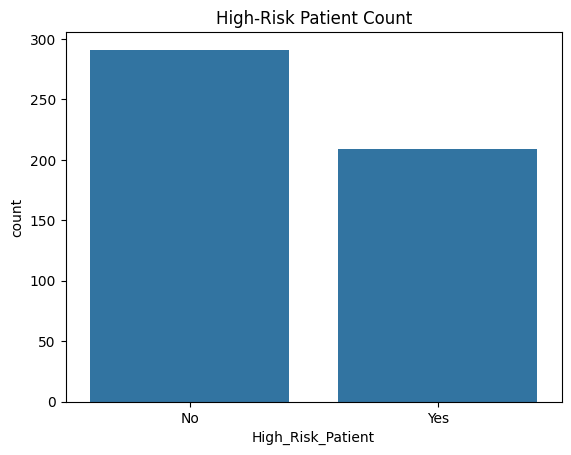

In [16]:
#VISUALIZE HIGH-RISK PATIENT COUNT

sns.countplot(x="High_Risk_Patient", data=df)
plt.title("High-Risk Patient Count")
plt.show()

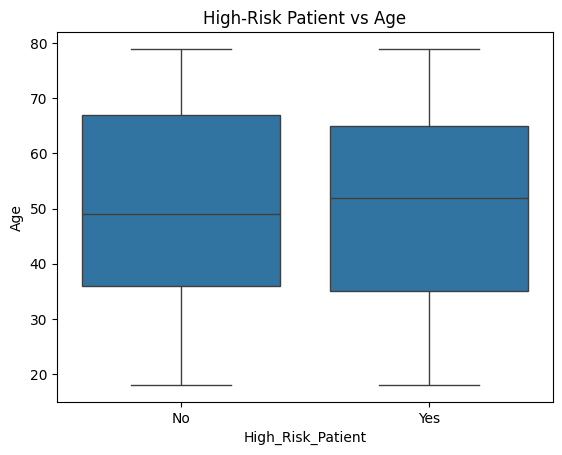

In [39]:
#HIGH-RISK PATIENT vs AGE

sns.boxplot(x="High_Risk_Patient",y="Age", data=df)
plt.title("High-Risk Patient vs Age")
plt.show()


In [5]:
#RISK SCORE

df["Risk_Score"] = (
    (df["Age"] > 50).astype(int) +
    (df["BMI"] > 25).astype(int) +
    (df["Blood_Pressure"] > 140).astype(int) +
    (df["Sugar_Level"] > 140).astype(int) +
    (df["Cholesterol"] > 140).astype(int) 
)

df["Risk_Score"].head()
    

0    3
1    3
2    2
3    3
4    3
Name: Risk_Score, dtype: int64

In [6]:
#SCORE DISTRIBUTION(POPULATION IN RISK)

df["Risk_Score"].value_counts().sort_index()

Risk_Score
1     37
2    116
3    183
4    132
5     32
Name: count, dtype: int64

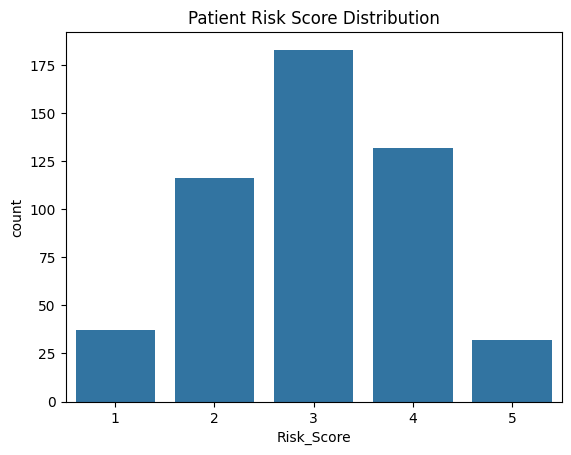

In [17]:
#VISUALIZE RISK SCORE

sns.countplot(x="Risk_Score",data=df)
plt.title("Patient Risk Score Distribution")
plt.show()
    

### what we learned?

Analysis of High_Risk_Patients and impact of age on it, Risk_Score and its distribution

In [10]:
#SELECT INPUTS(FEATURES)& TARGET

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

x = df[["Age", "BMI", "Blood_Pressure", "Sugar_Level", "Cholesterol"]]

y = LabelEncoder().fit_transform(df["Heart_Risk"])

print(x.head())
print(y[:5])

   Age   BMI  Blood_Pressure  Sugar_Level  Cholesterol
0   56  28.5             119           90          235
1   69  24.3             128          220          299
2   46  24.6             120          176          238
3   32  23.6             171          149          171
4   60  26.5              91          116          241
[1 0 1 0 0]


In [11]:
#SPLIT DATA

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [12]:
#CREATE & TRAIN THE MODEL LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [13]:
#MAKING PREDICTION

y_pred = model.predict(x_test)


In [23]:
#ACCURACY CHECK

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.88

In [14]:
#CONFUSION MATRIX

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 8, 24]])

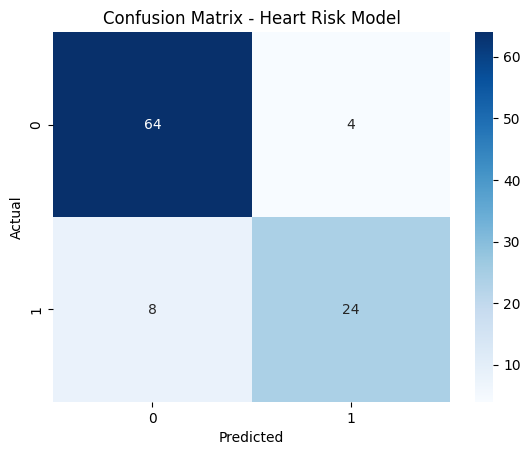

In [15]:
#CONFUSION MATRIX AS HEATMAP

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d",cmap="Blues")
plt.title("Confusion Matrix - Heart Risk Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
#CLASSIFICATION REPORT

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        68
           1       0.86      0.75      0.80        32

    accuracy                           0.88       100
   macro avg       0.87      0.85      0.86       100
weighted avg       0.88      0.88      0.88       100



In [17]:
#EXTRACT FEATURE IMPORTANCE FROM MODEL

import pandas as pd

importance = pd.Series(model.coef_[0], index=x.columns)
importance.sort_values(ascending=False)

Age               0.001434
Sugar_Level       0.000545
BMI              -0.007241
Cholesterol      -0.068058
Blood_Pressure   -0.114834
dtype: float64

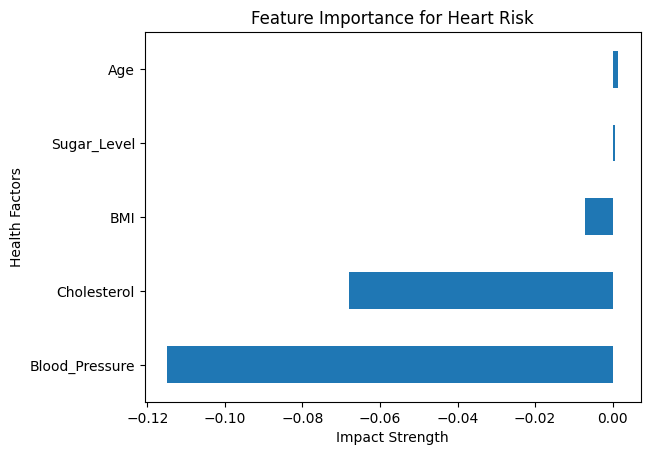

In [18]:
#VISUALIZE FEATURE IMPORTANCE

importance.sort_values().plot(kind="barh",title="Feature Importance for Heart Risk")
plt.xlabel("Impact Strength")
plt.ylabel("Health Factors")
plt.show()

In [19]:
#PREDICT HEART RISK FOR ALL PATIENTS

df["Predicted_Heart_Risk"] = model.predict(x)
df.head()

,Age,Gender,BMI,Blood_Pressure,Sugar_Level,Cholesterol,Smoking,Diabetes_Risk,Heart_Risk,Predicted_Heart_Risk
0,56,Female,28.5,119,90,235,Yes,Low,Low,0
1,69,Male,24.3,128,220,299,No,High,High,0
2,46,Female,24.6,120,176,238,No,High,Low,0
3,32,Male,23.6,171,149,171,Yes,High,High,0
4,60,Male,26.5,91,116,241,Yes,Low,High,1


In [27]:
#HEART RISK vs PREDICTED HEART RISK

df["Predicted_Heart_Risk_Label"] = df["Predicted_Heart_Risk"].map({0: "Low", 1: "High"})
df[["Heart_Risk","Predicted_Heart_Risk_Label"]].head()

,Heart_Risk,Predicted_Heart_Risk_Label
0,Low,Low
1,High,Low
2,Low,Low
3,High,Low
4,High,High


In [28]:
#COUNT OF HIGH RISK PATIENTS

df["Predicted_Heart_Risk_Label"].value_counts()

Predicted_Heart_Risk_Label
Low     344
High    156
Name: count, dtype: int64

In [29]:
#PREDICTED HIGH RISK PATIENTS

high_risk_patients = df[df["Predicted_Heart_Risk_Label"] == "High"]
high_risk_patients.head(10)

,Age,Gender,BMI,Blood_Pressure,Sugar_Level,Cholesterol,Smoking,Diabetes_Risk,Heart_Risk,Predicted_Heart_Risk,Risk_Score,Predicted_Heart_Risk_Label
4,60,Male,26.5,91,116,241,Yes,Low,High,1,3,High
7,38,Female,24.6,101,212,151,Yes,High,Low,1,2,High
8,56,Male,26.4,128,94,178,Yes,Low,Low,1,3,High
10,36,Male,12.7,102,120,199,No,Low,Low,1,1,High
13,28,Female,24.7,106,90,193,Yes,Low,Low,1,1,High
14,41,Female,26.3,149,210,171,No,High,High,1,4,High
20,39,Male,18.2,119,121,179,Yes,Low,Low,1,1,High
24,61,Male,20.9,117,104,174,No,Low,Low,1,2,High
30,50,Male,25.8,109,215,221,Yes,High,Low,1,3,High
33,39,Female,25.8,106,146,154,Yes,High,Low,1,3,High


In [48]:
#ACTUAL vs PREDICTED RISK

pd.crosstab(df["Heart_Risk"],df["Predicted_Heart_Risk_Label"])

Predicted_Heart_Risk_Label,High,Low
Heart_Risk,,
High,21,311
Low,135,33


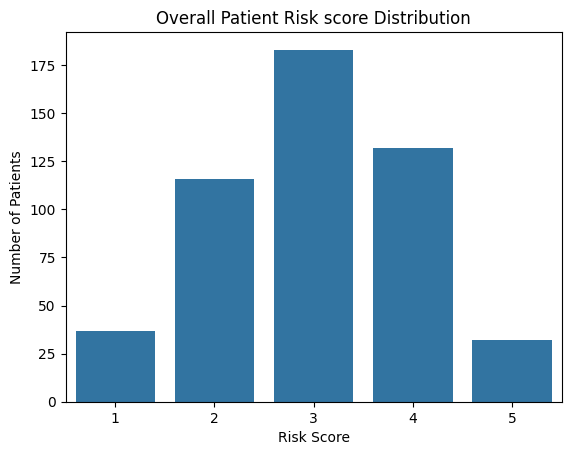

In [21]:
#OVERALL RISK SCORE DISTRIBUTION

sns.countplot(x="Risk_Score", data=df)
plt.title("Overall Patient Risk score Distribution")
plt.xlabel("Risk Score")
plt.ylabel("Number of Patients")
plt.show()

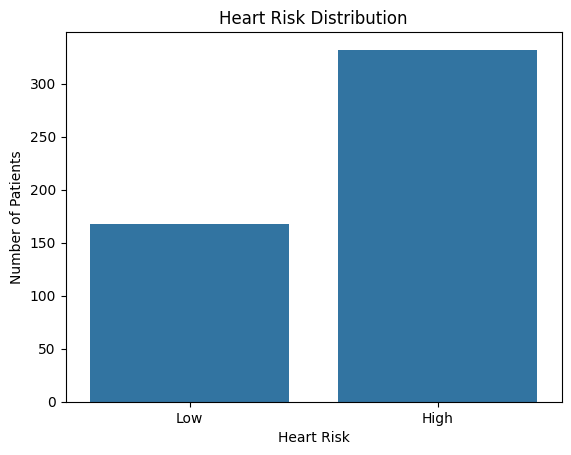

In [23]:
#HEART RISK DISTRIBUTION

sns.countplot(x="Heart_Risk",data=df)
plt.title("Heart Risk Distribution")
plt.xlabel("Heart Risk")
plt.ylabel("Number of Patients")
plt.show()

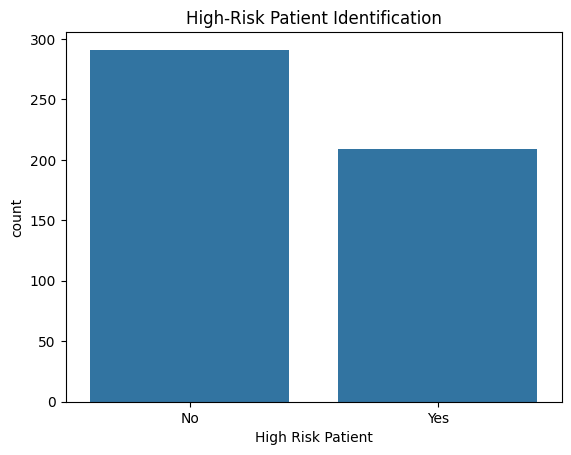

In [40]:
#HIGH-RISK PATIENT COUNT

sns.countplot(x="High_Risk_Patient",data=df)
plt.title("High-Risk Patient Identification")
plt.xlabel("High Risk Patient")
plt.ylabel("count")
plt.show()

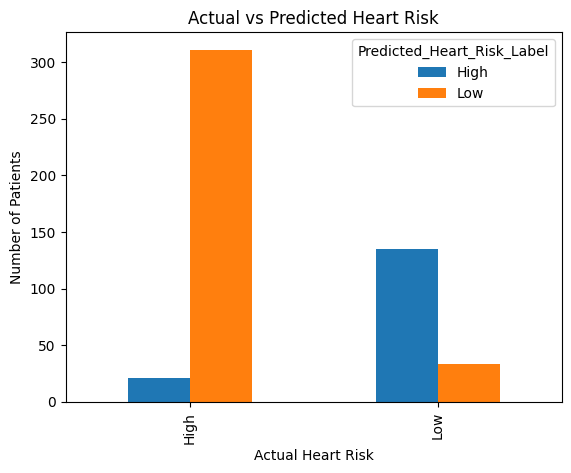

In [42]:
#ACTUAL vs PREDICTED HEART RISK 

pd.crosstab(
    df["Heart_Risk"],
    df["Predicted_Heart_Risk_Label"]
).plot(kind="bar")
plt.title("Actual vs Predicted Heart Risk")
plt.xlabel("Actual Heart Risk")
plt.ylabel("Number of Patients")
plt.show()


In [19]:
#SUMMARY STATISTICS TABLE 

df[[
    "Age",
    "BMI",
    "Blood_Pressure",
    "Sugar_Level",
    "Cholesterol",
    "Risk_Score"
]].describe()

,Age,BMI,Blood_Pressure,Sugar_Level,Cholesterol,Risk_Score
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,49.910000,24.74340,134.610000,162.908000,226.496000,3.012000
std,18.221909,5.14956,26.334786,53.763375,44.283044,1.024674
min,18.000000,7.60000,90.000000,71.000000,150.000000,1.000000
25%,35.000000,21.40000,111.750000,114.500000,188.750000,2.000000
50%,50.000000,24.80000,134.500000,167.500000,226.500000,3.000000
75%,66.000000,28.32500,159.000000,212.000000,265.000000,4.000000
max,79.000000,38.90000,179.000000,249.000000,299.000000,5.000000


## Healthcare Patient Risk Analysis — Summary

This project analyzes patient health data to identify risk patterns related to heart disease and diabetes.
Using exploratory data analysis, risk scoring, and machine learning, high-risk patients were identified
to support preventive healthcare and early intervention.


## Key Medical Findings

- Blood Pressure and Cholesterol are the strongest predictors of heart disease risk.
- Higher BMI is more strongly associated with diabetes risk than heart disease.
- A significant portion of patients fall into medium to high risk categories.
- Machine learning models were effective in predicting heart risk with good accuracy.


## Healthcare Recommendations

- Patients with high blood pressure should be prioritized for heart disease screening.
- Lifestyle interventions should focus on weight management and sugar control.
- Regular monitoring of cholesterol levels is essential.
- Predictive models can assist doctors in early risk detection.


## Limitations and extensive Work

- The dataset size is limited and may not represent the entire population.
- extensive work could include additional features such as family history and exercise habits.
- Advanced machine learning models could improve prediction accuracy.
